# Example usage of new augmentation
## Loading example image

In [1]:
import os
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))

from videoseal.utils.helpers import plot

import torch
from torchvision.transforms import v2, ToPILImage, ToTensor

from PIL import Image

import warnings
warnings.filterwarnings('ignore')

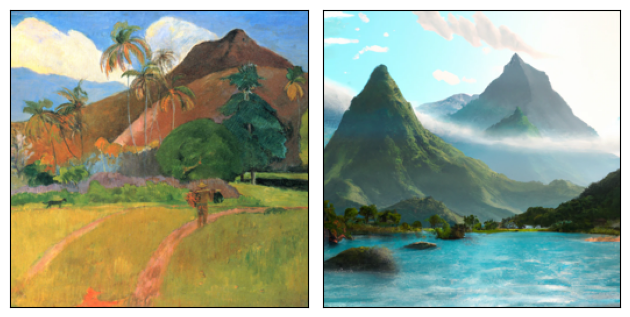

In [2]:
pil_imgs = [
    Image.open("/private/home/pfz/_images/gauguin_256.png"),
    Image.open("/private/home/pfz/_images/tahiti_256.png")
]

default_transform = ToTensor()

imgs = torch.stack([default_transform(img) for img in pil_imgs])

plot([pil_imgs])

## Bordering

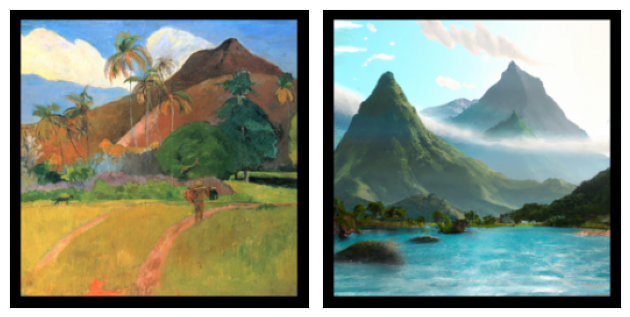

In [3]:
from videoseal.augmentation.valuemetric import Pad

pad = Pad(512, pad_value=10)
pad_imgs = pad(imgs)

plot(pad_imgs)

## Insert Meme text

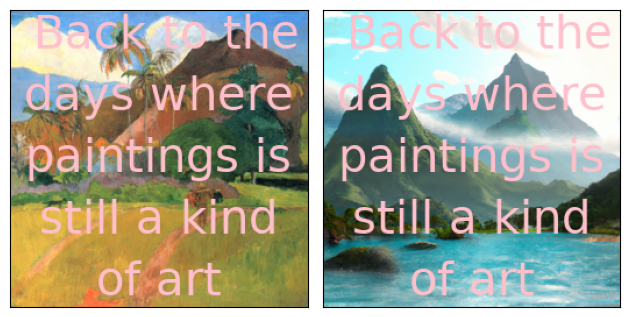

In [7]:
from videoseal.augmentation.valuemetric import InsertMemeText

meme = InsertMemeText(text="Back to the days where paintings is still a kind of art", color="pink", font_size=40, rel_pos=20)

imgs_with_meme = meme(imgs)

plot(imgs_with_meme)

## Insert Logo

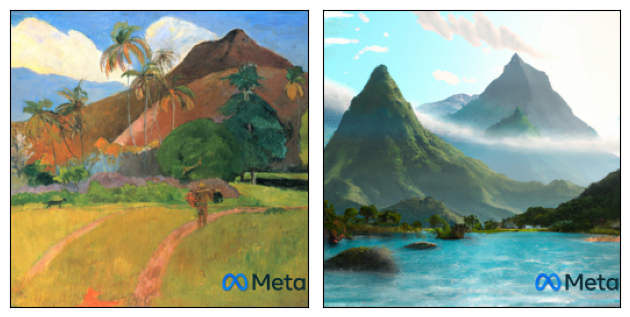

In [6]:
from videoseal.augmentation.valuemetric import InsertLogo

logo = InsertLogo(logo_path="assets/Meta-Logo.png", logo_scale=0.3)

imgs_with_logo = logo(imgs)

plot(imgs_with_logo)

### Exposure Augs

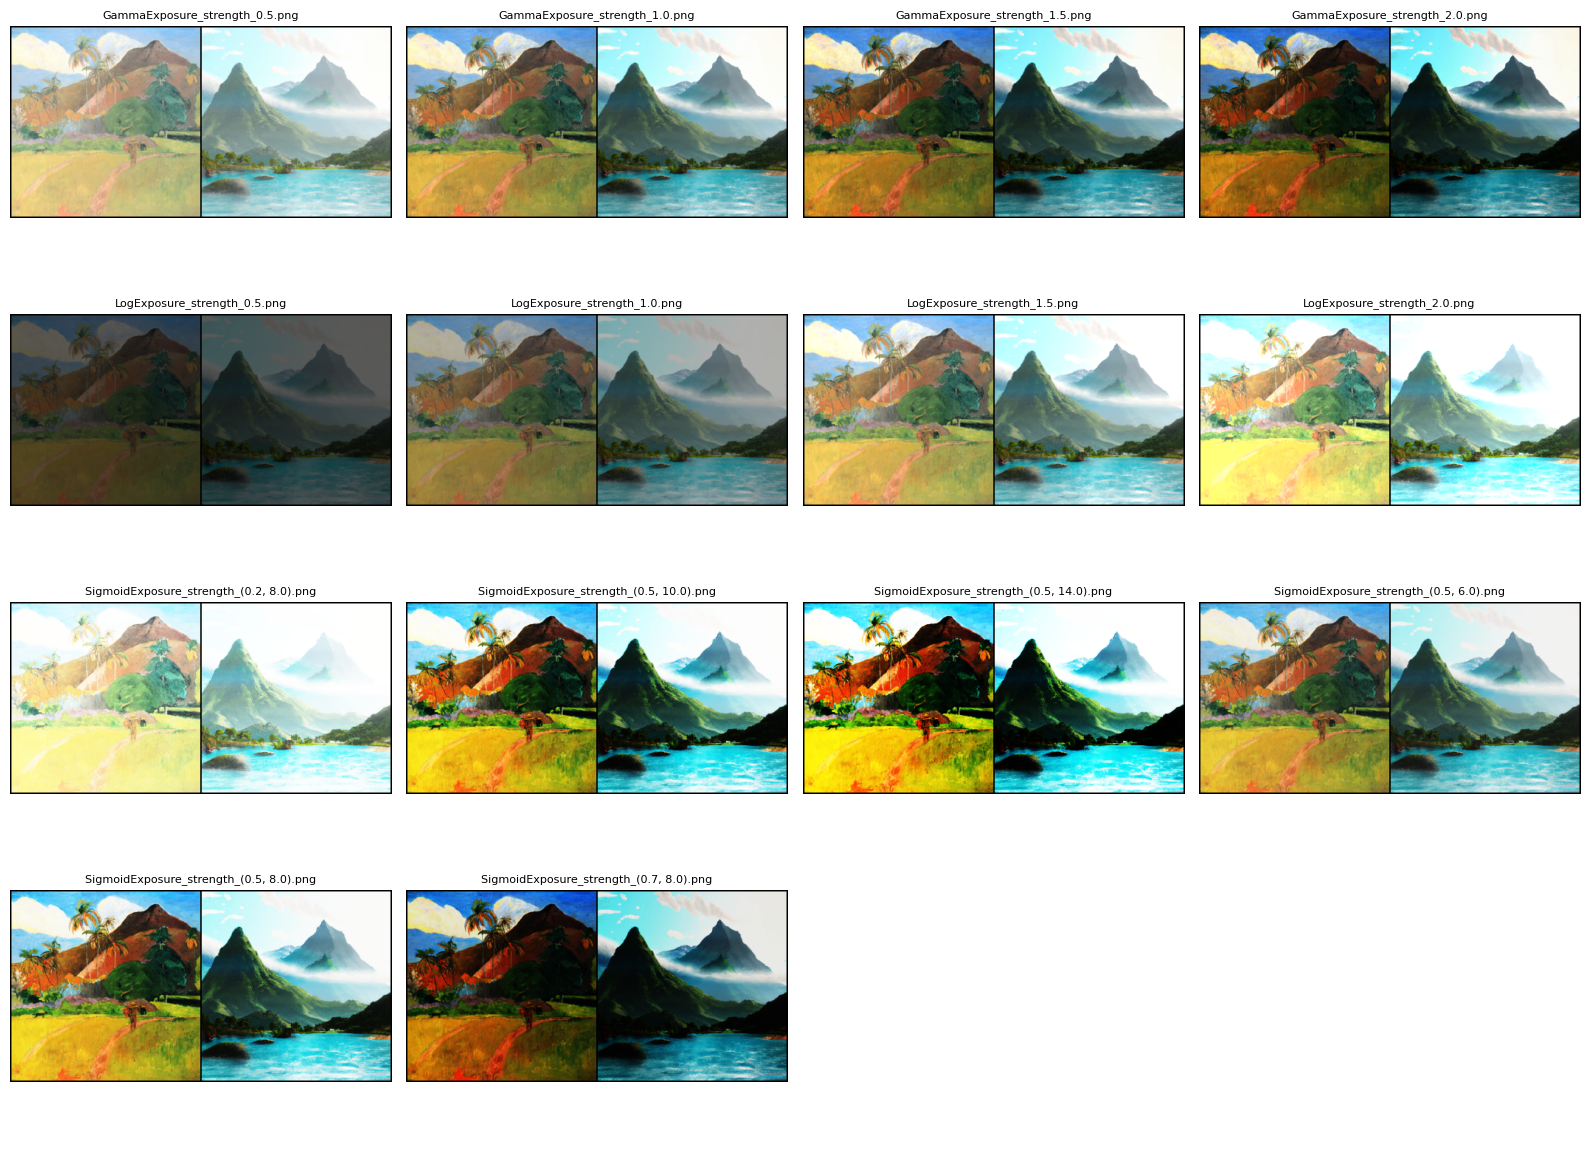

In [10]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

base_dir = Path("/private/home/pfz/09-videoseal/videoseal/outputs")
img_files = sorted([p for p in base_dir.iterdir() if p.is_file() and "exposure" in p.name.lower()])

if not img_files:
    print(f"No images containing 'Exposure' found in {base_dir}")
else:
    cols = 4
    n = len(img_files)
    rows = (n + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = fig.axes  # list of Axes in row-major order

    for i, p in enumerate(img_files):
        img = Image.open(p).convert("RGB")
        axes[i].imshow(img)
        axes[i].set_title(p.name, fontsize=8)
        axes[i].axis("off")

    # turn off any remaining empty subplots
    for j in range(n, rows * cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

### Noise

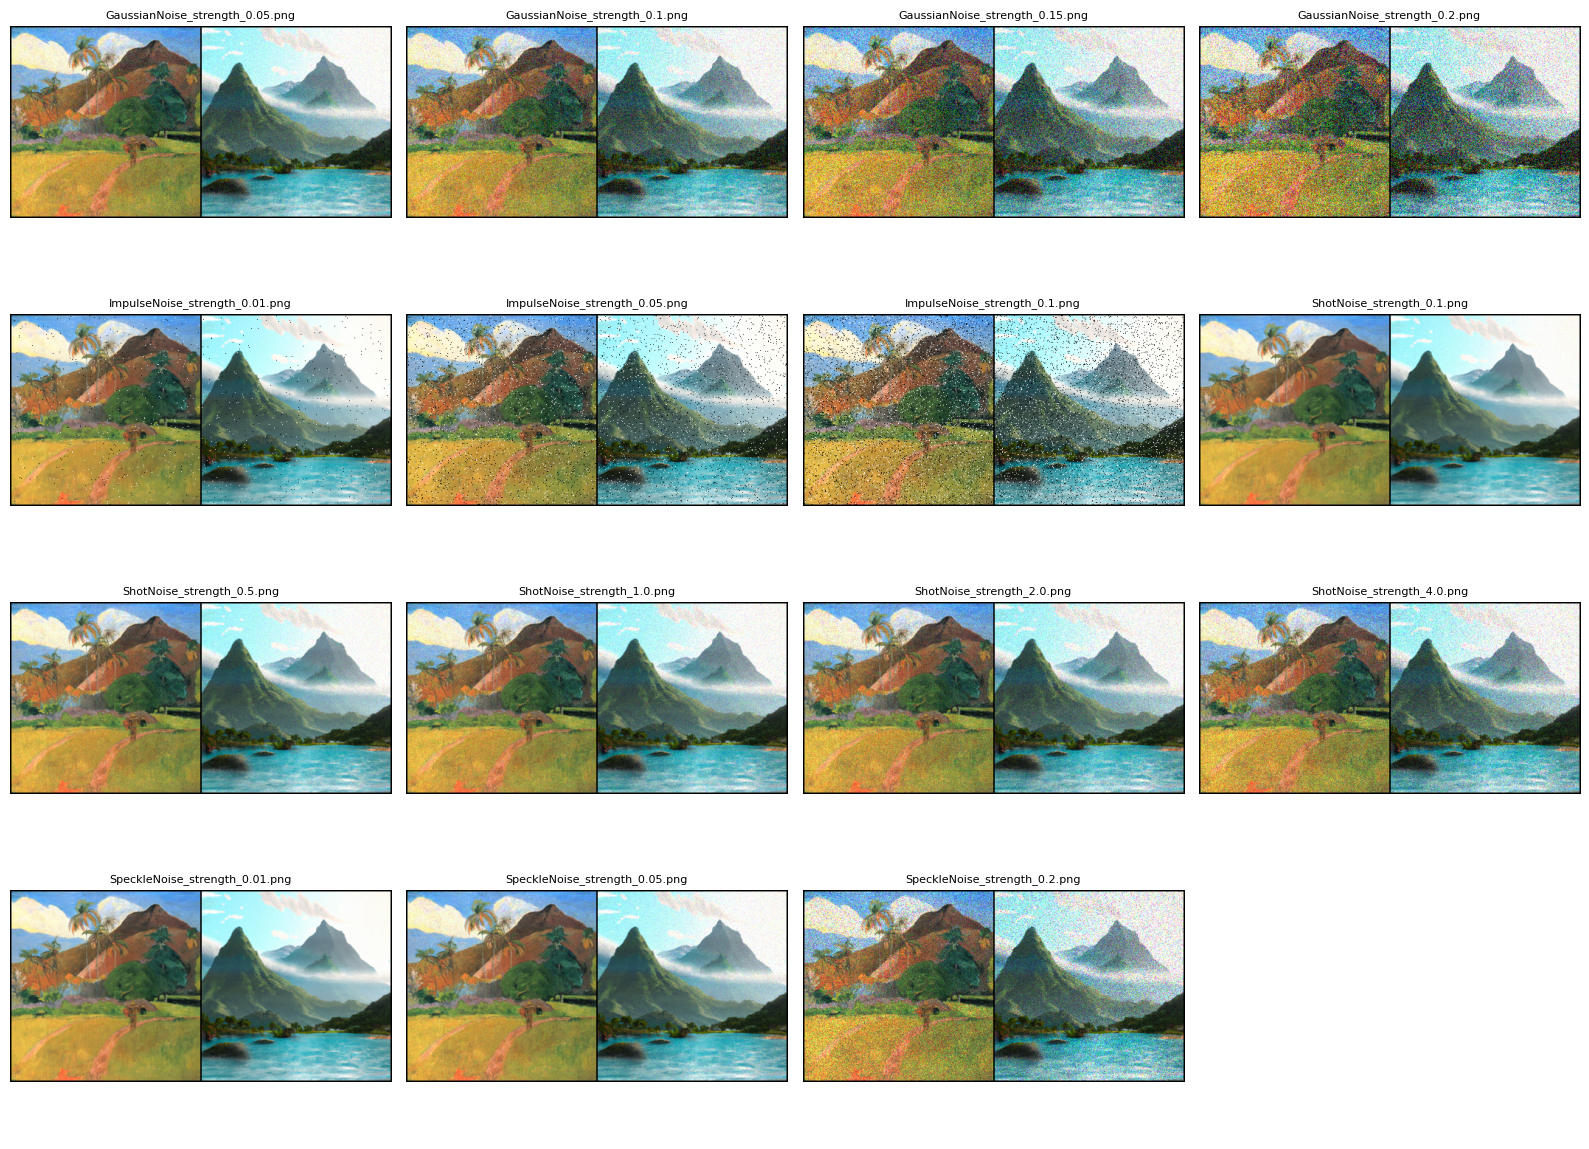

In [13]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

base_dir = Path("/private/home/pfz/09-videoseal/videoseal/outputs")
img_files = sorted([p for p in base_dir.iterdir() if p.is_file() and "noise" in p.name.lower()])

if not img_files:
    print(f"No images containing 'noise' found in {base_dir}")
else:
    cols = 4
    n = len(img_files)
    rows = (n + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = fig.axes  # list of Axes in row-major order

    for i, p in enumerate(img_files):
        img = Image.open(p).convert("RGB")
        axes[i].imshow(img)
        axes[i].set_title(p.name, fontsize=8)
        axes[i].axis("off")

    # turn off any remaining empty subplots
    for j in range(n, rows * cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

In [16]:
import torch

def shot_noise(image: torch.Tensor, scale: float = 1.0) -> torch.Tensor:
    """Apply Poisson (shot) noise. scale controls brightness before Poisson sampling."""
    if scale <= 0:
        return image
    img = torch.clamp(image, 0, 1)
    vals = (img * 255.0 / scale)
    noisy = torch.poisson(vals) / (255.0 / scale)
    return torch.clamp(noisy, 0, 1)

def shot_noise(image: torch.Tensor, scale: float = 1.0) -> torch.Tensor:
    """Apply Poisson (shot) noise using a straight-through estimator."""
    if scale <= 0:
        return image
    img = torch.clamp(image, 0, 1)
    vals = img * 255.0 / scale
    noisy_vals = torch.poisson(vals)
    noisy = vals + (noisy_vals - vals).detach()
    noisy = noisy / (255.0 / scale)
    return torch.clamp(noisy, 0, 1)

# --- Test differentiability ---
x = torch.rand(1, 3, 4, 4, requires_grad=True)  # A small random image
y = shot_noise(x, scale=1.0)

try:
    y.mean().backward()
    print("✅ Differentiable! Gradients computed.")
except RuntimeError as e:
    print("❌ Not differentiable:")
    print(e)

print("Grad sample:", x.grad)

✅ Differentiable! Gradients computed.
Grad sample: tensor([[[[0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0000, 0.0208]],

         [[0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0208, 0.0208]],

         [[0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0208, 0.0208],
          [0.0208, 0.0208, 0.0208, 0.0208]]]])


### Emoji augs

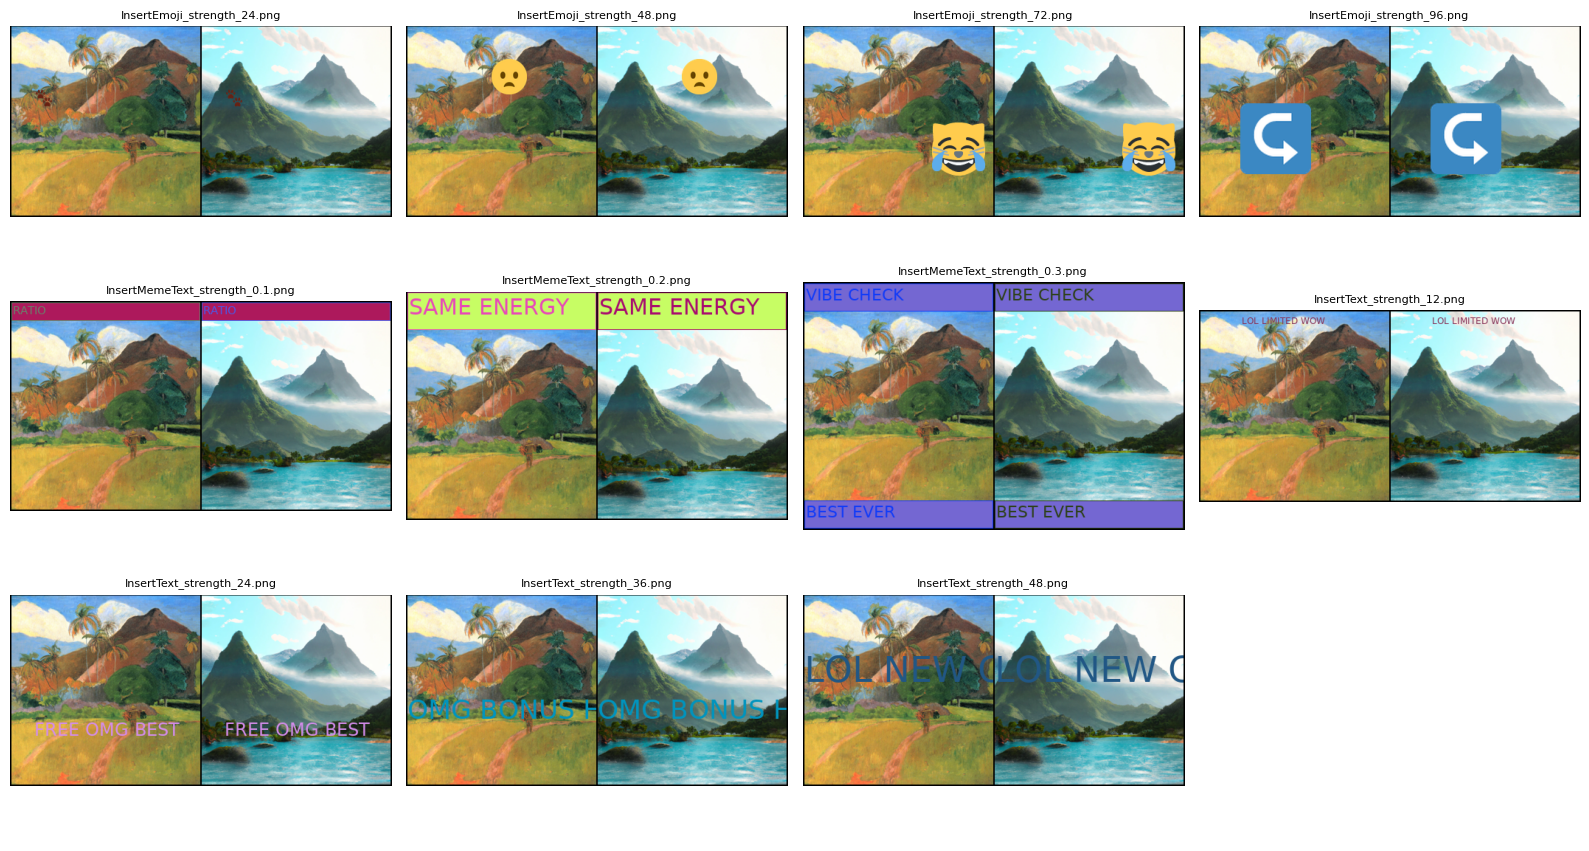

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

base_dir = Path("/private/home/pfz/09-videoseal/videoseal/outputs")
img_files = sorted([p for p in base_dir.iterdir() if p.is_file()])

if not img_files:
    print(f"No images containing 'Exposure' found in {base_dir}")
else:
    cols = 4
    n = len(img_files)
    rows = (n + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
    axes = fig.axes  # list of Axes in row-major order

    for i, p in enumerate(img_files):
        img = Image.open(p).convert("RGB")
        axes[i].imshow(img)
        axes[i].set_title(p.name, fontsize=8)
        axes[i].axis("off")

    # turn off any remaining empty subplots
    for j in range(n, rows * cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()